In [1]:
! pip install -U spacy
! python -m spacy download en
! pip install spacy
! pip install spacymoji
! pip install emoji
! pip install scikit-learn
! pip install gensim
! pip install sklearn
! pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 12.8/12.8 MB 5.8 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import spacy
import emoji
import numpy as np
from tqdm import tqdm

from sklearn.cluster import DBSCAN
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from gensim.test.utils import get_tmpfile

In [3]:
datsetPath = '../Datasets/corto.csv'
#datsetPath = '../Datasets/SuicideDetection.csv'

data = pd.read_csv(datsetPath)

textos = []
for instancia in data.values:
    textos.append(instancia[1])

In [4]:
# Cuidado! La ejecución de este bloque con 232074 instancias, toma aproximademente 5 min?

nlp = spacy.load("en_core_web_sm") # Cargar modelo
nlp.add_pipe("emoji", first=True)

textos_tokenizados = []
for texto in tqdm(textos, desc="Procesando textos"):
    texto = emoji.demojize(texto)  # Emojis a texto
    doc = nlp(texto)
    lexical_tokens = [token.lemma_.lower() for token in doc if len(token.text) > 3 and token.is_alpha]
    textos_tokenizados.append(lexical_tokens)

Procesando textos: 100%|██████████| 76/76 [00:01<00:00, 47.12it/s]


In [63]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(textos_tokenizados)]
model = Doc2Vec(documents, vector_size=150, window=2, dm=1, epochs=100, workers=4)

model.build_vocab(documents)
model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

model.save(get_tmpfile("my_doc2vec_model"))


In [64]:
document_vectors = [model.infer_vector(doc) for doc in textos_tokenizados]
print(document_vectors[1])

[-0.27125332 -0.08167718 -0.01814141 -0.16024213 -0.09772179 -0.02866779
  0.07265142 -0.11393686 -0.2535955   0.22212066 -0.17246403 -0.23480341
 -0.05762997  0.04575091 -0.34656394  0.45793873  0.31230092 -0.08910309
 -0.19449568  0.18247756  0.03350059 -0.42639711 -0.00522503  0.18443263
 -0.04596911 -0.07307338 -0.00907174 -0.07663554  0.22712934  0.11584548
 -0.10345808  0.2481528   0.03126622 -0.13230479 -0.11773527 -0.03711743
  0.17220475 -0.01656953  0.02011377  0.11324673 -0.09486999 -0.23812877
 -0.14195494 -0.4347167  -0.01615418 -0.294072    0.20480856 -0.22415733
 -0.19353652  0.2771884  -0.07281367  0.02409329  0.01509409  0.09129797
  0.49493665  0.47915706 -0.27366805 -0.08995144  0.03694827 -0.334323
  0.04287641  0.29702082  0.06642851  0.2503054   0.00157899 -0.11856565
 -0.21589828 -0.21973471 -0.18101273  0.18802658  0.3455845   0.2699751
 -0.06017283 -0.11424693  0.16371445  0.23675781 -0.06936306 -0.06216344
 -0.05367474  0.0373976   0.19876933 -0.27840135  0.11

In [65]:
epsilon = 6
minP = 5

In [66]:
import numpy as np

vecinos = []
nucleos = []
#alcanzables = []

for i, doc in enumerate(document_vectors):
    v = []
    for j, doc2 in enumerate(document_vectors):
        distEuc = np.linalg.norm(doc - doc2)
        print(distEuc)
        if distEuc <= epsilon:
            v.append((j,doc2))
    vecinos.append(v)
    if len(v)+1 >= minP:
        nucleos.append((i, doc))


print(f'Tenemos un total de {len(document_vectors)} instancias, de las cuales son:'
      f'\\\nNúcleos: {len(nucleos)}')

#print(f' Nuestros núcleos son: \n {nucleos}')

0.0
7.4672046
8.573095
7.3118896
15.820856
11.447252
12.881823
7.4042387
10.957541
11.622015
8.069832
9.021421
7.261471
9.073558
7.5006332
7.7323494
11.859651
7.493498
7.4555917
9.239544
10.874917
7.540754
15.546387
15.594476
11.607192
7.3013315
9.70321
11.801005
9.383452
7.8556275
6.5830536
8.649019
6.941238
11.565868
8.584364
7.1810575
10.951209
9.716476
14.466482
7.2173624
6.988808
7.3948836
12.739773
7.3053846
7.81797
7.668848
9.033547
8.793056
7.1623187
7.3952475
11.533544
9.85215
7.811184
7.2335625
9.518242
7.558539
7.005319
9.183776
7.2873435
8.1358795
7.5616508
12.090786
11.831337
7.7672186
7.0407705
7.7488823
11.460829
10.24347
7.273016
9.946125
8.048638
17.830227
11.508201
15.906353
7.4356685
8.725342
7.4672046
0.0
4.421237
2.835536
13.545841
10.605219
9.814185
3.1061163
7.2143183
9.497503
4.0066366
5.7512884
3.140004
6.713479
2.2342567
3.3985693
10.937807
3.132813
2.3702927
5.8594537
9.826344
2.9014204
14.381776
14.350047
9.1138315
3.8845901
8.270441
10.327703
5.785364
2.494

In [67]:
clusters = []
numCluster = -1
for i in range(len(document_vectors)):
    clusters.append(-1)

nucleosPorVisitar = []
for i, nucleo in nucleos:
    if clusters[i] == -1:
        numCluster += 1
        clusters[i] = numCluster
        nucleosPorVisitar.append((i, nucleo))
        while nucleosPorVisitar:
            j, nucleo_actual = nucleosPorVisitar.pop()
            for index, vecino in vecinos[j]:
                if clusters[index] == -1:
                    clusters[index] = numCluster
                    if (j, nucleo_actual) in nucleos:
                        nucleosPorVisitar.append((j, nucleo_actual))
print(clusters)

[-1, 0, 0, 0, -1, -1, -1, 0, -1, -1, 0, 0, 0, -1, 0, 0, -1, 0, 0, 0, -1, 0, -1, -1, -1, 0, -1, -1, 0, 0, 0, -1, 0, -1, 0, 0, -1, -1, -1, 0, 0, 0, -1, 0, -1, 0, 1, 0, 0, 0, -1, 2, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, -1, 0, 0, 0, -1, -1, 0, -1, 0, -1, -1, -1, 0, 3]


In [68]:
extras = 1
if min(clusters)==-1 : extras = 2
total = 0
for cluster in range(min(clusters), max(clusters)+1):
    kont = 0
    for i in clusters:
        if i == cluster:
            kont += 1
    if cluster == -1:
        print(f'Hay un total de {kont} instancias que son ruido')
    else:
        print(f'Del cluster {cluster} hay {kont} instancias')
    total = total + kont
cluster_labels=clusters

Hay un total de 31 instancias que son ruido
Del cluster 0 hay 42 instancias
Del cluster 1 hay 1 instancias
Del cluster 2 hay 1 instancias
Del cluster 3 hay 1 instancias


In [69]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para gráficos 3D

def plot_samples(samples, n_dimensiones, X_train_space):
    if n_dimensiones == 2:
        # Dibujar los puntos en el espacio, color: cluster
        plt.scatter(X_train_space[:samples, 0], X_train_space[:samples, 1], cmap=plt.cm.get_cmap('nipy_spectral', 10), c=cluster_labels[:samples])
        plt.colorbar()
    elif n_dimensiones == 3:
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111, projection='3d')
        sc = ax.scatter(X_train_space[:samples, 0], X_train_space[:samples, 1], X_train_space[:samples, 2], cmap='viridis', c=cluster_labels[:samples])
        plt.legend(*sc.legend_elements(), title="Clases")
        # Mostrar la gráfica en 3D
        plt.show()
    else:
        pass

# Llama a la función plot_samples con tus datos y la cantidad de instancias a mostrar
# plot_samples(samples, n_dimensiones, X_train_space)


Dim after PCA:  (76, 3)


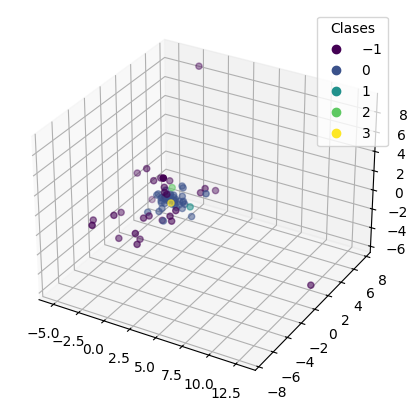

In [70]:

from sklearn.decomposition import PCA
n_dimensiones= 3
pca = PCA(n_components=n_dimensiones, random_state=42)
pca.fit(document_vectors)
# Cambio de base a dos dimensiones PCA
X_train_PCAspace = pca.transform(document_vectors)
print('Dim after PCA: ',X_train_PCAspace.shape)
plot_samples(300, n_dimensiones, X_train_PCAspace)

In [71]:
# Aplicar DBSCAN a los vectores de documentos
dbscan = DBSCAN(eps=epsilon, min_samples=minP)  # Ajusta los parámetros según tu caso
model=dbscan.fit(document_vectors)
cluster_labels = dbscan.fit_predict(document_vectors)

# Los resultados del clustering están en 'labels'
print("Etiquetas de clusters:", cluster_labels[22])

Etiquetas de clusters: -1


Dim after PCA:  (76, 3)


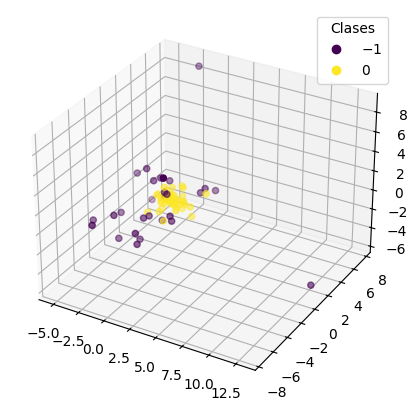

In [72]:
from sklearn.decomposition import PCA
n_dimensiones= 3
pca = PCA(n_components=n_dimensiones, random_state=42)
pca.fit(document_vectors)
# Cambio de base a dos dimensiones PCA
X_train_PCAspace = pca.transform(document_vectors)
print('Dim after PCA: ',X_train_PCAspace.shape)
plot_samples(300, n_dimensiones, X_train_PCAspace)